<a href="https://colab.research.google.com/github/diskmarster/CalculatorDLL-file-test/blob/master/MandatoryAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datafile = "https://raw.githubusercontent.com/jpandersen61/Machine-Learning/refs/heads/main/50_Startups.csv"
dataset = pd.read_csv(datafile)
print(dataset.head())
print(dataset.info())
print(dataset.describe())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000

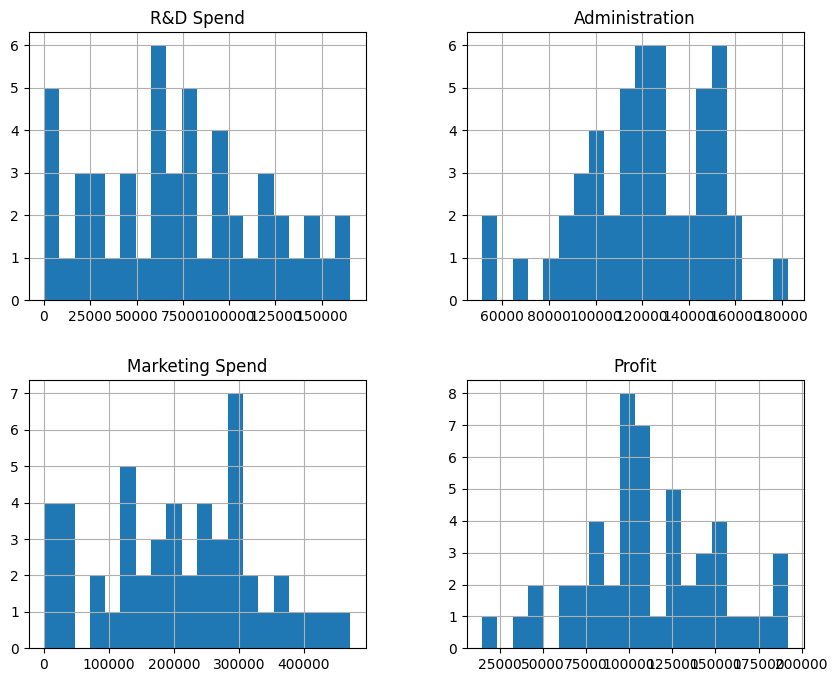

In [2]:
dataset.hist(bins=20, figsize=(10, 8))
plt.show()

Profit             1.000000
R&D Spend          0.972900
Marketing Spend    0.747766
Administration     0.200717
Name: Profit, dtype: float64


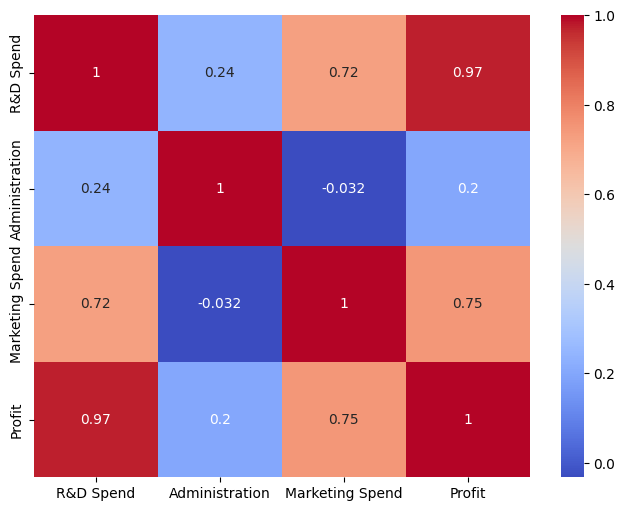

In [3]:
corr_matrix = dataset.corr(numeric_only=True)
print(corr_matrix["Profit"].sort_values(ascending=False))

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [4]:
dataset = dataset.drop('State', axis=1)

In [5]:
from sklearn.model_selection import train_test_split

X = dataset.drop("Profit", axis=1)
y = dataset["Profit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [7]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
print("RMSE on training set:", rmse)

RMSE on training set: 8938.013440232062


In [8]:
y_test_pred = lin_reg.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
print("RMSE on test set:", rmse_test)

RMSE on test set: 8995.905803361415


In [9]:
print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)

Intercept: 54071.87574599082
Coefficients: [ 0.80377928 -0.06792917  0.03124155]
